# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file /home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/rex/anaconda3

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin", 
    language="en", 
    sort_by="relevancy")


In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum", 
    language="en", 
    sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

sentiments = []
#article text list for tokenization
btc_text = []
#Construct a list of articles and text with thier corresponding senitment scores 
for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        #Construct a list of pure text to passs though tokenization
        btc_text.append(text)
        
        sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass



# Create DataFrame
btc_scores_df = pd.DataFrame(sentiments)
btc_scores_df.head()


,text,date,compound,positive,negative,neutral
0,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24T22:50:30Z,-0.2280,0.072,0.097,0.831
1,"Other fund vehicles hold crypto directly, but ...",2022-03-24T07:00:10Z,-0.1154,0.116,0.154,0.730
2,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17T13:33:43Z,0.0000,0.000,0.000,1.000
3,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23T20:40:00Z,0.4939,0.123,0.000,0.877
4,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12T18:34:00Z,-0.7713,0.000,0.169,0.831


In [7]:
# Create the Ethereum sentiment scores DataFrame
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

sentiments = []
eth_text = []
#Construct a list of articles with thier corresponding senitment scores 
for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        #Construct a list of pure text to passs though tokenization
        eth_text.append(text)
        
        sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_scores_df = pd.DataFrame(sentiments)
eth_scores_df.head()

,text,date,compound,positive,negative,neutral
0,"In February, shit hit the fan in the usual way...",2022-03-01T14:00:00Z,-0.3182,0.059,0.093,0.848
1,Coinbase reported that the share of trading vo...,2022-02-25T17:02:30Z,0.6705,0.188,0.000,0.812
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26T20:29:04Z,-0.4588,0.000,0.083,0.917
3,His name is Vitalik Buterin and after dedicati...,2022-03-22T00:41:00Z,0.0000,0.000,0.000,1.000
4,"It seems that in 2022, you cant escape from th...",2022-03-03T16:00:00Z,-0.1326,0.000,0.044,0.956


In [8]:
# Describe the Bitcoin Sentiment
btc_scores_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.087470,0.073300,0.051350,0.875400
std,0.416342,0.046323,0.065312,0.074044
min,-0.771300,0.000000,0.000000,0.730000
25%,-0.153000,0.053250,0.000000,0.831000
50%,0.223100,0.077500,0.019000,0.870500
75%,0.430825,0.099500,0.092500,0.922250
max,0.636900,0.171000,0.187000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_scores_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.210425,0.080850,0.024600,0.89450
std,0.427857,0.094548,0.037614,0.10717
min,-0.526700,0.000000,0.000000,0.68200
25%,0.000000,0.000000,0.000000,0.84100
50%,0.000000,0.053000,0.000000,0.91450
75%,0.528675,0.141500,0.048500,1.00000
max,0.867600,0.270000,0.115000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium

Q: Which coin had the highest compound score?

A: Etherium

Q. Which coin had the highest positive score?

A: Etherium

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/rex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/rex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /home/rex/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /home/rex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
stopwords_set = stopwords.words('english')
# Expand the default stopwords list if necessary
sw_addon = ["said", "mr"]
stopwords_set += sw_addon 

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    tokens = []
    clean = []
    # Remove the punctuation from text
    for sentence in text:
        re_clean_snt = regex.sub('',sentence)
    # Create a tokenized list of the words
        word_tokens = word_tokenize(re_clean_snt)
    # Lemmatize words into root words
        for word in word_tokens:
            lem = lemmatizer.lemmatize(word)
    # Convert the words to lowercase
            word_lowercase = lem.lower()
    # Remove the stop words
            if word_lowercase not in stopwords_set:
                clean.append(word_lowercase)
        tokens.append(clean)
        clean = []
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_scores_df["tokenization"] = tokenizer(btc_text)
btc_scores_df.head()

,text,date,compound,positive,negative,neutral,tokenization
0,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24T22:50:30Z,-0.2280,0.072,0.097,0.831,"[spiekers, prominent, customer, described, wha..."
1,"Other fund vehicles hold crypto directly, but ...",2022-03-24T07:00:10Z,-0.1154,0.116,0.154,0.730,"[fund, vehicle, hold, crypto, directly, theyre..."
2,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17T13:33:43Z,0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
3,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23T20:40:00Z,0.4939,0.123,0.000,0.877,"[san, salvador, march, reuters, el, salvador, ..."
4,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12T18:34:00Z,-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_scores_df["tokenization"] = tokenizer(eth_text)
eth_scores_df.head()

,text,date,compound,positive,negative,neutral,tokenization
0,"In February, shit hit the fan in the usual way...",2022-03-01T14:00:00Z,-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,Coinbase reported that the share of trading vo...,2022-02-25T17:02:30Z,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26T20:29:04Z,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,His name is Vitalik Buterin and after dedicati...,2022-03-22T00:41:00Z,0.0000,0.000,0.000,1.000,"[name, vitalik, buterin, dedicating, cover, re..."
4,"It seems that in 2022, you cant escape from th...",2022-03-03T16:00:00Z,-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

#tokenize the articles into a list of lists

processed_btc_list = tokenizer(btc_text)
btc_words = []
#for each processed article (p_article), deconstruct them into a list of words and calculate bigram accounts and store in a dictionary of lists

for p_article in processed_btc_list:
    for words in p_article:
        btc_words.append(words)   
        
btc_bigram_counts = Counter(ngrams(btc_words, n=2))
print(dict(btc_bigram_counts.most_common(10)))

{('march', 'reuters'): 9, ('reuters', 'bitcoin'): 4, ('char', 'san'): 3, ('san', 'salvador'): 3, ('salvador', 'march'): 3, ('reuters', 'el'): 3, ('el', 'salvador'): 3, ('char', 'march'): 3, ('russia', 'invaded'): 2, ('invaded', 'ukraine'): 2}


In [17]:
# Generate the Ethereum N-grams where N=2
#tokenize the articles into a list of lists

processed_eth_list = tokenizer(eth_text)
eth_words = []
#for each processed article (p_article), deconstruct them into a list of words and calculate bigram accounts and store in a dictionary of lists
for p_article in processed_eth_list:
    for words in p_article:
        eth_words.append(words)   
        
eth_bigram_counts = Counter(ngrams(eth_words, n=2))
print(dict(eth_bigram_counts.most_common(10)))

{('char', 'cryptocurrency'): 4, ('cryptocurrency', 'boom'): 4, ('boom', 'past'): 4, ('past', 'year'): 4, ('year', 'ha'): 4, ('ha', 'helped'): 4, ('helped', 'propel'): 4, ('propel', 'newer'): 4, ('newer', 'market'): 4, ('market', 'record'): 4}


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_words, 10)

[('char', 20),
 ('bitcoin', 14),
 ('march', 9),
 ('reuters', 9),
 ('crypto', 6),
 ('salvador', 6),
 ('week', 6),
 ('russia', 4),
 ('ukraine', 4),
 ('government', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_words, 10)

[('char', 20),
 ('past', 9),
 ('ha', 8),
 ('cryptocurrency', 7),
 ('ethereum', 6),
 ('volume', 6),
 ('year', 6),
 ('digital', 6),
 ('hit', 5),
 ('billion', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

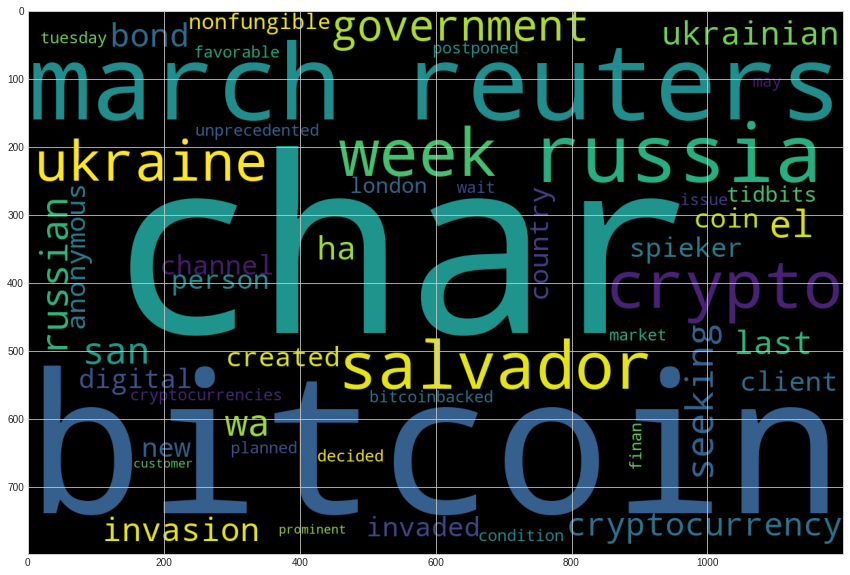

In [22]:
# Generate the Bitcoin word cloud
space = " "
btc_token_input_text = space.join(btc_words)
wc = WordCloud(width=1200, height=800, max_words=50).generate(btc_token_input_text)
plt.imshow(wc)

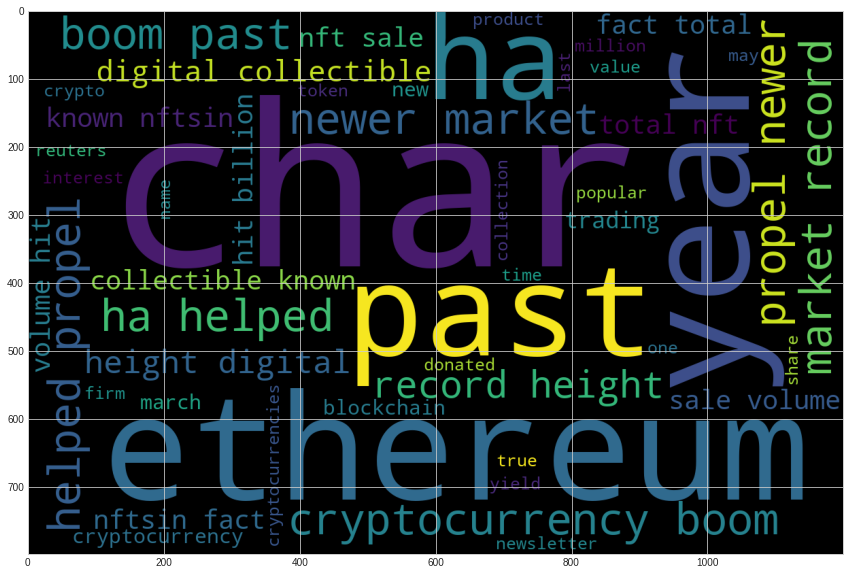

In [23]:
# Generate the Ethereum word cloud
eth_token_input_text = space.join(eth_words)
wc = WordCloud(width=1200, height=800, max_words=50).generate(eth_token_input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_raw_text = space.join(btc_text)
btc_raw_text

'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars] Other fund vehicles hold crypto directly, but theyre grappling with different structural problems and carry higher fees, which are a drag on returns.\r\nGrayscale Bitcoin Trust, the largest Bitcoin veh… [+2273 chars] When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars] SAN SALVADOR, March 23 (Reuters) - El Salvador is seeking support from cryptocurrency exchange Binance for its implementation of bitcoin as legal tender and the issuance of bitcoin bonds, the Central… [+1109 chars] "Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a 

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_raw_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Article Text"

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Spiekers', 'Eastern European', 'Spieker', '620,000', 'Grayscale Bitcoin Trust', 'Russia', 'Ukraine', 'Niki Proshin', 'a year', 'YouTube', 'TikTok', 'Instagram', 'Russian', 'SAN SALVADOR', 'March 23', 'Reuters', 'El Salvador', 'Binance', 'Central', 'the New York Times', 'March 22', 'Reuters', 'March 1', 'Reuters', 'Russia', 'Ukraine', 'Satoshi Nakamoto', '2008', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'this week', 'Russia', 'Ukraine', 'Ukrainians', 'Russian', 'this week', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'weekly', 'this week', 'Nurphoto/Getty', 'Russia', 'last Thursday', 'Ukranian', 'Mexico City', 'Telegr', 'LONDON', 'March 4', 'Reuters', 'Russia', 'Ukraine', 'Russia', 'SAN SALVADOR', 'March 22', 'Reuters', 'El Salvador', 'last week', 'finan', 'March 15', 'Reuters', 'U.S.', 'Joe Biden', 'KENNERDELL', 'Pa.', 'March 21', 'Reuters', 'LONDON', 'March 22', 'Reuters', 'Tuesday', 'almost three weeks', 'Russia', 'Ukraine', 'SAN SALVADOR', 'March 22', 'Reuters', 'El Salvador

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_raw_text = space.join(eth_text)
eth_raw_text

"In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars] Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin's share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars] Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars] His name is Vitalik Buterin and after dedicating the cover of its most recent edition to him, TIME has named him the King of Cryptocurrencies .\r\nBloomberg | Getty Images\r\n The 28-year-old Russian is … [+2627 chars] It seems that in 2022, you cant escape from the metaverse.\xa0From Facebook to Microsoft, seemingly every centralized tech f

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_raw_text)
# Add a title to the document
eth_doc.user_data["title"] = "Etherium Article Text"

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['February', 'Ethereum Name Service', 'ENS', 'May 201', 'Coinbase', 'last year', 'Between 2020 and 2021', 'James Bareham', 'More than $15 million', 'More than $15 million', 'Ukrainian', 'Russia', 'Vitalik Buterin', 'TIME', 'Bloomberg', 'Getty Images', '28-year-old', 'Russian', '2022', 'Facebook', 'Microsoft', 'the last year', 'Bored Ape Yacht Club', 'one', 'Ethereum', 'the past few years', 'NFT', '$23 billion', 'the past few years', 'NFT', '$24 billion', 'Joe Biden', 'Wednesday', 'first', 'TIME', 'weekly', 'the past few years', 'NFT', '$23 billion', 'the past few years', 'NFT', '$23 billion', 'NEW YORK', 'March 21', 'Reuters', 'a second straight week', 'CoinShares', 'Monday', 'Ethereum', 'March 24', 'Reuters', 'Leumi', 'first', 'Israeli', 'Pepper Invest', 'Thursday', 'U.S', '$450 million', 'Series', 'US', 'over $7 billion', 'Russia', 'Ukraine', 'American Express', 'the days', 'March 11', 'Yuga Labs', 'Meebits', 'Larva Labs', 'more than a dozen', 'Ethereum']


---